In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math
from mplsoccer import PyPizza, add_image, FontManager

In [231]:
#1. Import data

tipe = {'app':'Int64', 'min':'Int64', 'g':'Int64', 'a':'Int64',
       'ball_rec':'Int64', 'block':'Int64', 'crosses_blocked':'Int64', 'clearance':'Int64', 'CC':'Int64', 'take_on_s':'Int64',
       'foul':'Int64', 'offside':'Int64', 'fouled':'Int64', 'cs':'Int64', 'g_conceded':'Int64', 'tackle':'Int64', 'header':'Int64',
       'intercept':'Int64', 'OG':'Int64', 'crs':'Int64', 'att_pass':'Int64', 'pass_suc':'Int64', 'g_penalty':'Int64', 'saves':'Int64',
       'son':'Int64', 'soff':'Int64', 'shots':'Int64', 'yc':'Int64', 'rc':'Int64'}
df = pd.read_csv('player-stat-liga-1.csv',sep=';',dtype=tipe).fillna(0).drop('crosses_blocked',axis=1)
df = df[['nama', 'klub', 'nationality', 'pos', 'age', 'app', 'min', 'g', 'a',
       'ball_rec', 'block', 'clearance', 'CC', 'take_on_s', 'foul', 'offside',
       'fouled', 'cs', 'g_conceded', 'tackle', 'header', 'intercept', 'OG',
       'crs', 'att_pass', 'pass_suc', 'g_penalty', 'saves', 'son', 'soff',
       'shots', 'yc', 'rc']]
df[df['nama'].str.contains('sayuri')]

,nama,klub,nationality,pos,age,app,min,g,a,ball_rec,...,crs,att_pass,pass_suc,g_penalty,saves,son,soff,shots,yc,rc
496,yance sayuri,psm,idn,mf,26,10,900,1,1,9,...,4,336,222,0,0,5,4,9,1,0
497,yakob sayuri,psm,idn,mf,26,10,817,0,0,6,...,3,235,159,0,0,3,16,19,0,0


In [297]:
#2. Divide data based on player's position
#a. Forward
fw = df[(df['pos']=='fw')&(df['shots']>0)].drop(['klub', 'nationality', 'pos','intercept','saves','g_conceded','cs','block','clearance','ball_rec','tackle','OG'],axis=1)
fw['pass_%'] = round((fw['pass_suc']/fw['att_pass'])*100,2)
fw['shot_per90'] = round(fw['shots']/(round(fw['min']/90,1)),2)
fw = fw.drop(['att_pass','pass_suc','header','yc','rc','app','foul','soff'],axis=1)
fw = fw.rename(columns={'min':'Minutes Played','g':'Goal','a':'Assist','take_on_s':'Successful Take On','CC':'Chance Created','offside':'Offside','fouled':'Fouled','crs':'Crosses','g_penalty':'Goal Penalty','son':'Shot on Target','shots':'Shots'})
#b. Midfielder
mf = df[(df['pos']=='mf')&(df['app']>0)].drop(['klub', 'nationality', 'pos','saves','g_conceded','cs','block','clearance','OG'],axis=1)
mf['pass_%'] = round((mf['pass_suc']/mf['att_pass'])*100,2)
mf = mf.drop(['att_pass','pass_suc','header','yc','rc','app','soff','offside'],axis=1)
mf = mf.rename(columns={'foul':'Fouls','tackle':'Tackles','intercept':'Interception','min':'Minutes Played','ball_rec':'Ball Recovery','g':'Goal','a':'Assist','take_on_s':'Successful Take On','CC':'Chance Created','fouled':'Fouled','crs':'Crosses','g_penalty':'Goal Penalty','son':'Shot on Target','shots':'Shots'})
#c. Defender
bc = df[(df['pos']=='df')&(df['app']>0)].drop(['g_penalty','klub', 'nationality', 'pos','saves','g_conceded','cs'],axis=1)
bc['pass_%'] = round((bc['pass_suc']/bc['att_pass'])*100,2)
bc['tackle_per90'] = round(bc['tackle']/(round(bc['min']/90,1)),2)
bc['intercept_per90'] = round(bc['intercept']/(round(bc['min']/90,1)),2)
bc['clear_per90'] = round(bc['clearance']/(round(bc['min']/90,1)),2)
bc['g/a'] = bc['g']+bc['a']
bc = bc.drop(['att_pass','pass_suc','g','a','take_on_s','offside','fouled','son','soff','shots','app','yc','rc','OG'],axis=1)
bc = bc.rename(columns={'clearance':'Clearance','CC':'Chance Created','header':'Aerial Won','foul':'Fouls','tackle':'Tackles','intercept':'Interception','min':'Minutes Played','ball_rec':'Ball Recovery','crs':'Crosses'})

#d. Goalkeeper
gk = df[(df['pos']=='gk')&(df['app']>0)].drop(['klub', 'nationality', 'pos','block','tackle','intercept','OG'],axis=1)
gk['pass_%'] = round((gk['pass_suc']/gk['att_pass'])*100,2)
gk['save_per90'] = round(gk['saves']/(round(gk['min']/90,1)),2)
gk = gk.drop(['att_pass','pass_suc','header', 'g', 'a',
       'ball_rec', 'CC', 'take_on_s', 'foul', 'offside', 'son', 'soff',
       'shots', 'g_penalty','crs','fouled','app'],axis=1)
gk['clean_sheet_%'] = round((gk['cs']/(round(gk['min']/90,1))*100),2)


In [298]:
gk.columns

Index(['nama', 'age', 'min', 'clearance', 'cs', 'g_conceded', 'saves', 'yc',
       'rc', 'pass_%', 'save_per90', 'clean_sheet_%'],
      dtype='object')

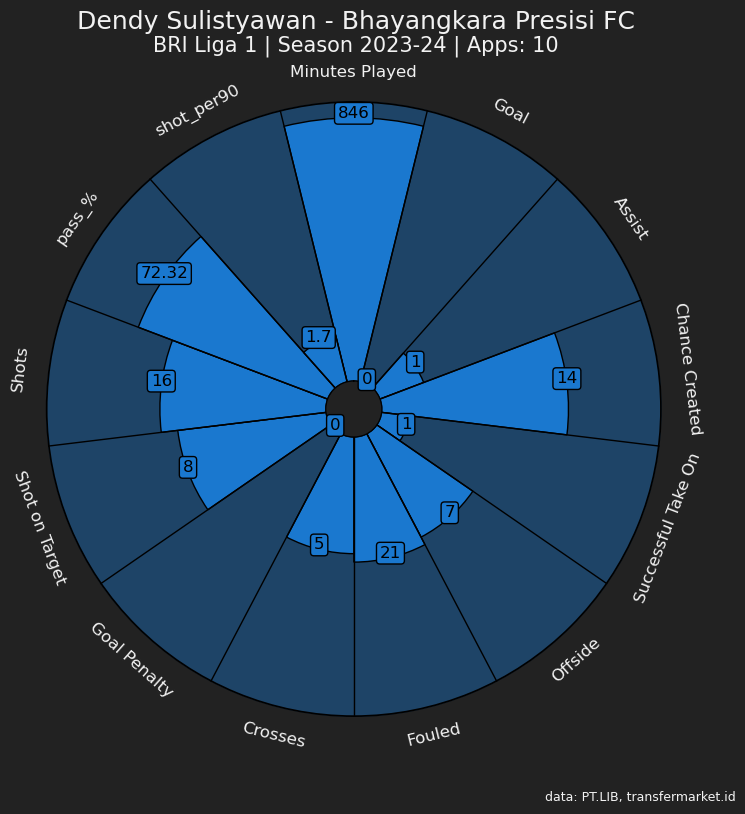

In [205]:
# setting up parameter for pizza plot
param_fw = list(fw.columns)
param_fw = param_fw[2:]
max_value = [900 ,   9 ,   6 ,  21 ,  10 ,   0 ,  47 ,  12 ,
         3 ,  15 ,  27 ,   100,   10]
min_value = [1,0,0,0,0,12,0,0,0,0,0,0,0]

#setting up value for pizza plot for player that got national call up
#1.Dendy Sulistyawan
dendy = fw[fw['nama']=='dendy sulistyawan']
dendy = list(dendy.iloc[0])
dendy = dendy[2:]

# instantiate PyPizza class
baker = PyPizza(
    params=param_fw,
    min_range=min_value,        # min range values
    max_range=max_value,        # max range values
    background_color="#222222", straight_line_color="#000000",
    last_circle_color="#000000", last_circle_lw=2.5, straight_line_lw=1,
    other_circle_lw=0, other_circle_color="#000000", inner_circle_size=10,
)

# plot pizza
fig, ax = baker.make_pizza(
    dendy,                     # list of values
    figsize=(8, 8),             # adjust figsize according to your need
    color_blank_space="same",   # use same color to fill blank space
    blank_alpha=0.4,            # alpha for blank-space colors
    param_location=110,         # where the parameters will be added
    kwargs_slices=dict(
        facecolor="#1A78CF", edgecolor="#000000",
        zorder=1, linewidth=1
    ),                          # values to be used when plotting slices
    kwargs_params=dict(
        color="#F2F2F2", fontsize=12, zorder=5, va="center"
    ),                          # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="#1A78CF",
            boxstyle="round,pad=0.2", lw=1
        )
    )                           # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.97, "Dendy Sulistyawan - Bhayangkara Presisi FC", size=18,
    ha="center", color="#F2F2F2"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "BRI Liga 1 | Season 2023-24 | Apps: 10",
    size=15,
    ha="center", color="#F2F2F2"
)

# add credits
CREDIT_1 = "data: PT.LIB, transfermarket.id"


fig.text(
    0.99, 0.005, f"{CREDIT_1}", size=9, color="#F2F2F2",
    ha="right"
)
plt.savefig("Dendy_S.png")
plt.show()


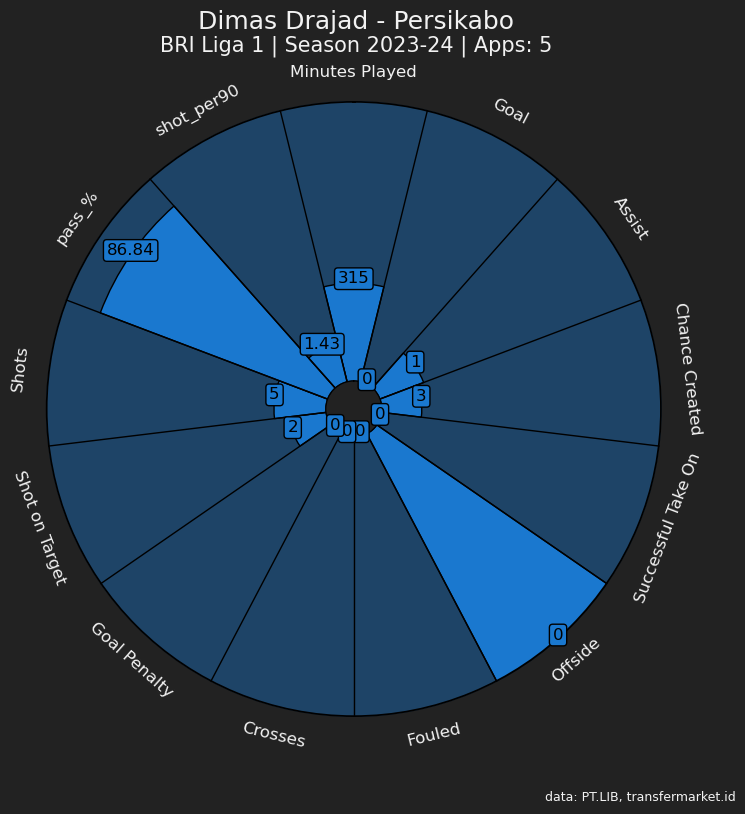

In [206]:
#2. Dimas Drajad
dimas = fw[fw['nama']=='dimas drajad']
dimas = list(dimas.iloc[0])
dimas = dimas[2:]

baker = PyPizza(
    params=param_fw,
    min_range=min_value,        # min range values
    max_range=max_value,        # max range values
    background_color="#222222", straight_line_color="#000000",
    last_circle_color="#000000", last_circle_lw=2.5, straight_line_lw=1,
    other_circle_lw=0, other_circle_color="#000000", inner_circle_size=10,
)

# plot pizza
fig, ax = baker.make_pizza(
    dimas,                     # list of values
    figsize=(8, 8),             # adjust figsize according to your need
    color_blank_space="same",   # use same color to fill blank space
    blank_alpha=0.4,            # alpha for blank-space colors
    param_location=110,         # where the parameters will be added
    kwargs_slices=dict(
        facecolor="#1A78CF", edgecolor="#000000",
        zorder=1, linewidth=1
    ),                          # values to be used when plotting slices
    kwargs_params=dict(
        color="#F2F2F2", fontsize=12, zorder=5, va="center"
    ),                          # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="#1A78CF",
            boxstyle="round,pad=0.2", lw=1
        )
    )                           # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.97, "Dimas Drajad - Persikabo", size=18,
    ha="center", color="#F2F2F2"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "BRI Liga 1 | Season 2023-24 | Apps: 5",
    size=15,
    ha="center", color="#F2F2F2"
)

# add credits
CREDIT_1 = "data: PT.LIB, transfermarket.id"


fig.text(
    0.99, 0.005, f"{CREDIT_1}", size=9, color="#F2F2F2",
    ha="right"
)
plt.savefig("Dimas_D.png")
plt.show()

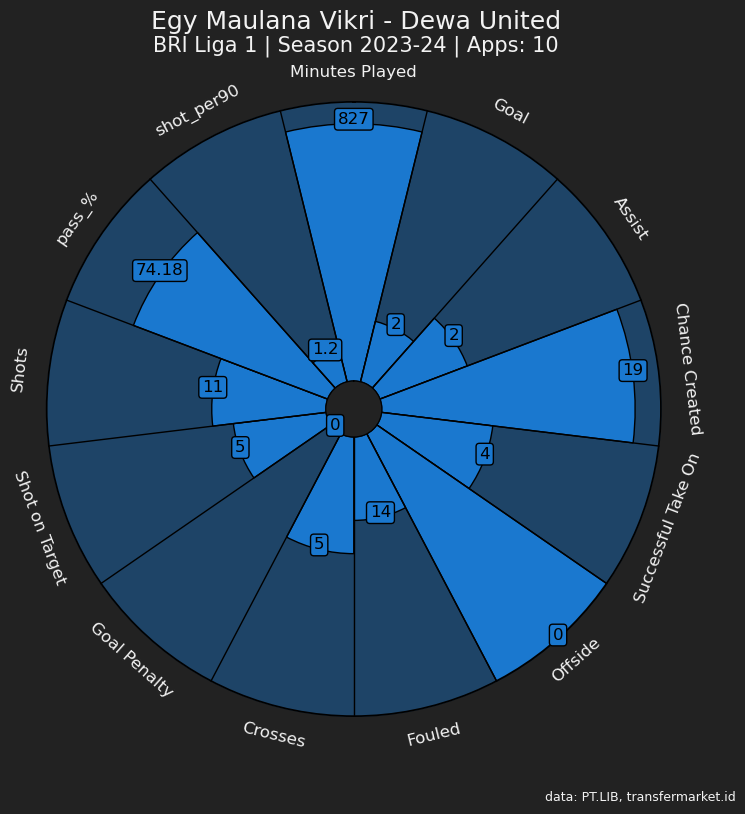

In [207]:
#3. Egy Maulana Vikri
egy = fw[fw['nama']=='egy maulana']
egy = list(egy.iloc[0])
egy = egy[2:]

baker = PyPizza(
    params=param_fw,
    min_range=min_value,        # min range values
    max_range=max_value,        # max range values
    background_color="#222222", straight_line_color="#000000",
    last_circle_color="#000000", last_circle_lw=2.5, straight_line_lw=1,
    other_circle_lw=0, other_circle_color="#000000", inner_circle_size=10,
)

# plot pizza
fig, ax = baker.make_pizza(
    egy,                     # list of values
    figsize=(8, 8),             # adjust figsize according to your need
    color_blank_space="same",   # use same color to fill blank space
    blank_alpha=0.4,            # alpha for blank-space colors
    param_location=110,         # where the parameters will be added
    kwargs_slices=dict(
        facecolor="#1A78CF", edgecolor="#000000",
        zorder=1, linewidth=1
    ),                          # values to be used when plotting slices
    kwargs_params=dict(
        color="#F2F2F2", fontsize=12, zorder=5, va="center"
    ),                          # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="#1A78CF",
            boxstyle="round,pad=0.2", lw=1
        )
    )                           # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.97, "Egy Maulana Vikri - Dewa United", size=18,
    ha="center", color="#F2F2F2"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "BRI Liga 1 | Season 2023-24 | Apps: 10",
    size=15,
    ha="center", color="#F2F2F2"
)

# add credits
CREDIT_1 = "data: PT.LIB, transfermarket.id"


fig.text(
    0.99, 0.005, f"{CREDIT_1}", size=9, color="#F2F2F2",
    ha="right"
)
plt.savefig("Egy_MV.png")
plt.show()

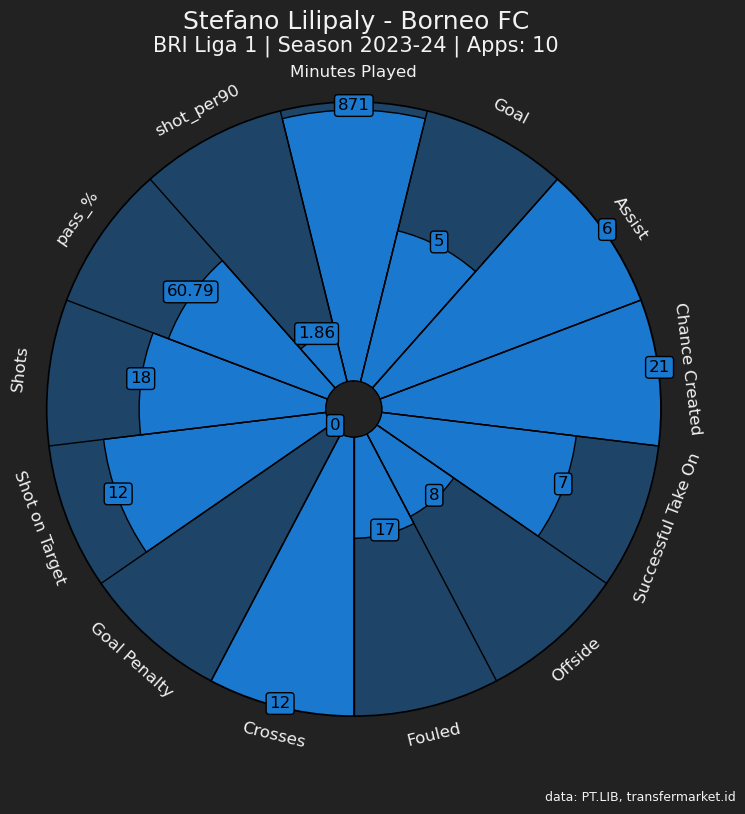

In [208]:
#4. Stefano Lilipaly
fano = fw[fw['nama']=='stefano lilipaly']
fano = list(fano.iloc[0])
fano = fano[2:]


baker = PyPizza(
    params=param_fw,
    min_range=min_value,        # min range values
    max_range=max_value,        # max range values
    background_color="#222222", straight_line_color="#000000",
    last_circle_color="#000000", last_circle_lw=2.5, straight_line_lw=1,
    other_circle_lw=0, other_circle_color="#000000", inner_circle_size=10,
)

# plot pizza
fig, ax = baker.make_pizza(
    fano,                     # list of values
    figsize=(8, 8),             # adjust figsize according to your need
    color_blank_space="same",   # use same color to fill blank space
    blank_alpha=0.4,            # alpha for blank-space colors
    param_location=110,         # where the parameters will be added
    kwargs_slices=dict(
        facecolor="#1A78CF", edgecolor="#000000",
        zorder=1, linewidth=1
    ),                          # values to be used when plotting slices
    kwargs_params=dict(
        color="#F2F2F2", fontsize=12, zorder=5, va="center"
    ),                          # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="#1A78CF",
            boxstyle="round,pad=0.2", lw=1
        )
    )                           # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.97, "Stefano Lilipaly - Borneo FC", size=18,
    ha="center", color="#F2F2F2"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "BRI Liga 1 | Season 2023-24 | Apps: 10",
    size=15,
    ha="center", color="#F2F2F2"
)

# add credits
CREDIT_1 = "data: PT.LIB, transfermarket.id"


fig.text(
    0.99, 0.005, f"{CREDIT_1}", size=9, color="#F2F2F2",
    ha="right"
)
plt.savefig("Lilipaly_S.png")
plt.show()

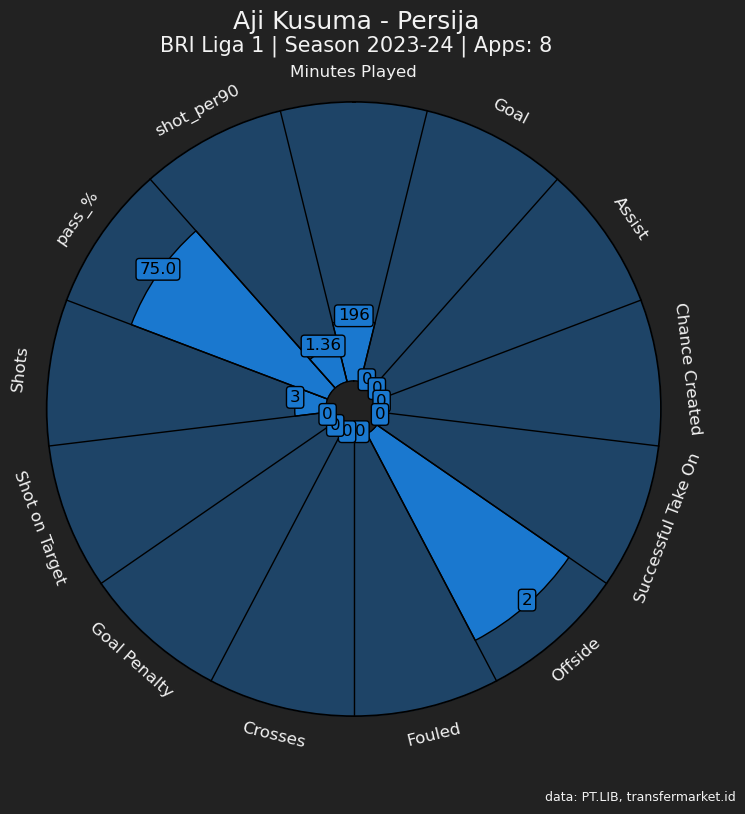

In [209]:
#5. Aji Kusuma
aji = fw[fw['nama']=='aji kusuma']
aji = list(aji.iloc[0])
aji = aji[2:]


baker = PyPizza(
    params=param_fw,
    min_range=min_value,        # min range values
    max_range=max_value,        # max range values
    background_color="#222222", straight_line_color="#000000",
    last_circle_color="#000000", last_circle_lw=2.5, straight_line_lw=1,
    other_circle_lw=0, other_circle_color="#000000", inner_circle_size=10,
)

# plot pizza
fig, ax = baker.make_pizza(
    aji,                     # list of values
    figsize=(8, 8),             # adjust figsize according to your need
    color_blank_space="same",   # use same color to fill blank space
    blank_alpha=0.4,            # alpha for blank-space colors
    param_location=110,         # where the parameters will be added
    kwargs_slices=dict(
        facecolor="#1A78CF", edgecolor="#000000",
        zorder=1, linewidth=1
    ),                          # values to be used when plotting slices
    kwargs_params=dict(
        color="#F2F2F2", fontsize=12, zorder=5, va="center"
    ),                          # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="#1A78CF",
            boxstyle="round,pad=0.2", lw=1
        )
    )                           # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.97, "Aji Kusuma - Persija", size=18,
    ha="center", color="#F2F2F2"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "BRI Liga 1 | Season 2023-24 | Apps: 8",
    size=15,
    ha="center", color="#F2F2F2"
)

# add credits
CREDIT_1 = "data: PT.LIB, transfermarket.id"


fig.text(
    0.99, 0.005, f"{CREDIT_1}", size=9, color="#F2F2F2",
    ha="right"
)
plt.savefig("Aji_S.png")
plt.show()

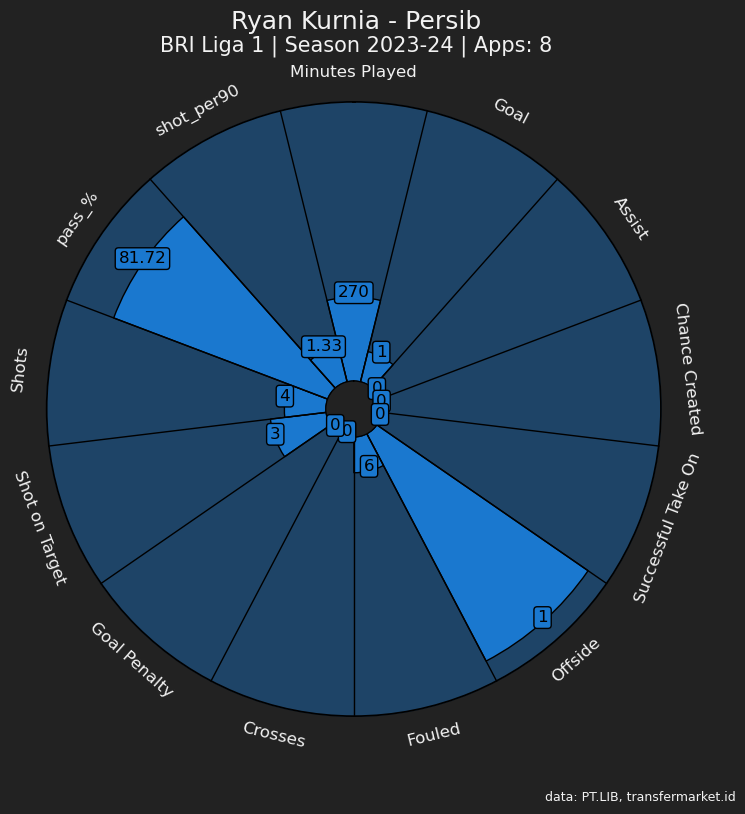

In [219]:
#6. Ryan Kurnia
ryan = fw[fw['nama']=='ryan kurnia']
ryan = list(ryan.iloc[0])
ryan = ryan[2:]


baker = PyPizza(
    params=param_fw,
    min_range=min_value,        # min range values
    max_range=max_value,        # max range values
    background_color="#222222", straight_line_color="#000000",
    last_circle_color="#000000", last_circle_lw=2.5, straight_line_lw=1,
    other_circle_lw=0, other_circle_color="#000000", inner_circle_size=10,
)

# plot pizza
fig, ax = baker.make_pizza(
    ryan,                     # list of values
    figsize=(8, 8),             # adjust figsize according to your need
    color_blank_space="same",   # use same color to fill blank space
    blank_alpha=0.4,            # alpha for blank-space colors
    param_location=110,         # where the parameters will be added
    kwargs_slices=dict(
        facecolor="#1A78CF", edgecolor="#000000",
        zorder=1, linewidth=1
    ),                          # values to be used when plotting slices
    kwargs_params=dict(
        color="#F2F2F2", fontsize=12, zorder=5, va="center"
    ),                          # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="#1A78CF",
            boxstyle="round,pad=0.2", lw=1
        )
    )                           # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.97, "Ryan Kurnia - Persib", size=18,
    ha="center", color="#F2F2F2"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "BRI Liga 1 | Season 2023-24 | Apps: 8",
    size=15,
    ha="center", color="#F2F2F2"
)

# add credits
CREDIT_1 = "data: PT.LIB, transfermarket.id"


fig.text(
    0.99, 0.005, f"{CREDIT_1}", size=9, color="#F2F2F2",
    ha="right"
)
plt.savefig("Ryan_K.png")
plt.show()


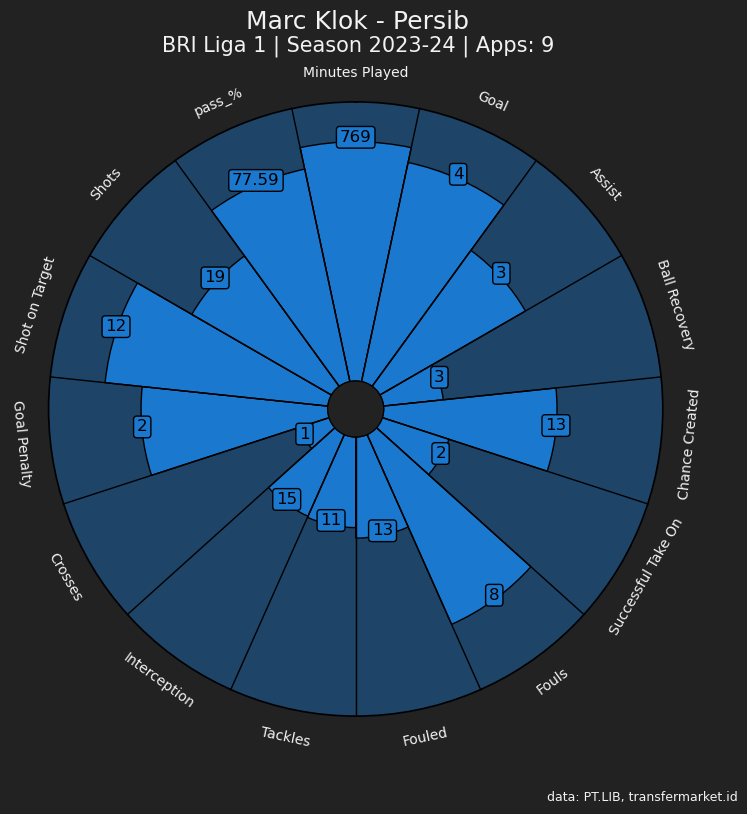

In [239]:
param_mf = list(mf.columns)
param_mf = param_mf[2:]
max_mf = [900,   5,   5,  14,  21,   8,  0,  36,  34,  47,
         9,   3,  15,  33,  100]
min_mf = [1,   0,   0,  0,  0,   0,  31,  0,  0,  0,
         0,   0,  0,  0,  0]

#7. Marc Klok
klok = mf[mf['nama']=='marc klok']
klok = list(klok.iloc[0])
klok = klok[2:]


baker = PyPizza(
    params=param_mf,
    min_range=min_mf,        # min range values
    max_range=max_mf,        # max range values
    background_color="#222222", straight_line_color="#000000",
    last_circle_color="#000000", last_circle_lw=2.5, straight_line_lw=1,
    other_circle_lw=0, other_circle_color="#000000", inner_circle_size=10,
)

# plot pizza
fig, ax = baker.make_pizza(
    klok,                     # list of values
    figsize=(8, 8),             # adjust figsize according to your need
    color_blank_space="same",   # use same color to fill blank space
    blank_alpha=0.4,            # alpha for blank-space colors
    param_location=110,         # where the parameters will be added
    kwargs_slices=dict(
        facecolor="#1A78CF", edgecolor="#000000",
        zorder=1, linewidth=1
    ),                          # values to be used when plotting slices
    kwargs_params=dict(
        color="#F2F2F2", fontsize=10, zorder=5, va="center"
    ),                          # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="#1A78CF",
            boxstyle="round,pad=0.2", lw=1
        )
    )                           # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.97, "Marc Klok - Persib", size=18,
    ha="center", color="#F2F2F2"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "BRI Liga 1 | Season 2023-24 | Apps: 9",
    size=15,
    ha="center", color="#F2F2F2"
)

# add credits
CREDIT_1 = "data: PT.LIB, transfermarket.id"


fig.text(
    0.99, 0.005, f"{CREDIT_1}", size=9, color="#F2F2F2",
    ha="right"
)
plt.savefig("M_Klok.png")
plt.show()


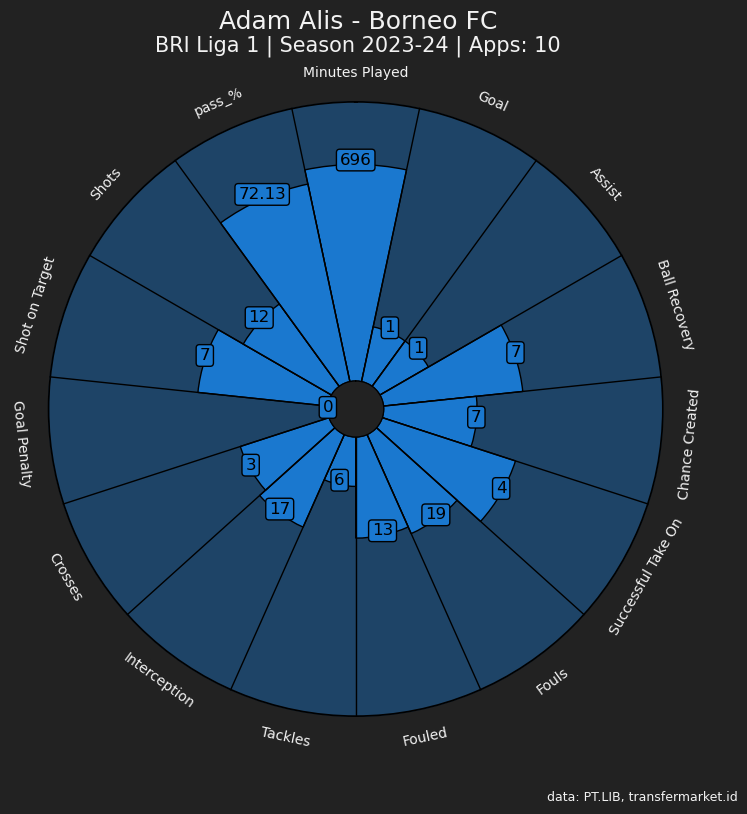

In [240]:

#8. Adam Alis
adam = mf[mf['nama']=='adam alis']
adam = list(adam.iloc[0])
adam = adam[2:]


baker = PyPizza(
    params=param_mf,
    min_range=min_mf,        # min range values
    max_range=max_mf,        # max range values
    background_color="#222222", straight_line_color="#000000",
    last_circle_color="#000000", last_circle_lw=2.5, straight_line_lw=1,
    other_circle_lw=0, other_circle_color="#000000", inner_circle_size=10,
)

# plot pizza
fig, ax = baker.make_pizza(
    adam,                     # list of values
    figsize=(8, 8),             # adjust figsize according to your need
    color_blank_space="same",   # use same color to fill blank space
    blank_alpha=0.4,            # alpha for blank-space colors
    param_location=110,         # where the parameters will be added
    kwargs_slices=dict(
        facecolor="#1A78CF", edgecolor="#000000",
        zorder=1, linewidth=1
    ),                          # values to be used when plotting slices
    kwargs_params=dict(
        color="#F2F2F2", fontsize=10, zorder=5, va="center"
    ),                          # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="#1A78CF",
            boxstyle="round,pad=0.2", lw=1
        )
    )                           # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.97, "Adam Alis - Borneo FC", size=18,
    ha="center", color="#F2F2F2"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "BRI Liga 1 | Season 2023-24 | Apps: 10",
    size=15,
    ha="center", color="#F2F2F2"
)

# add credits
CREDIT_1 = "data: PT.LIB, transfermarket.id"


fig.text(
    0.99, 0.005, f"{CREDIT_1}", size=9, color="#F2F2F2",
    ha="right"
)
plt.savefig("Adam_A.png")
plt.show()


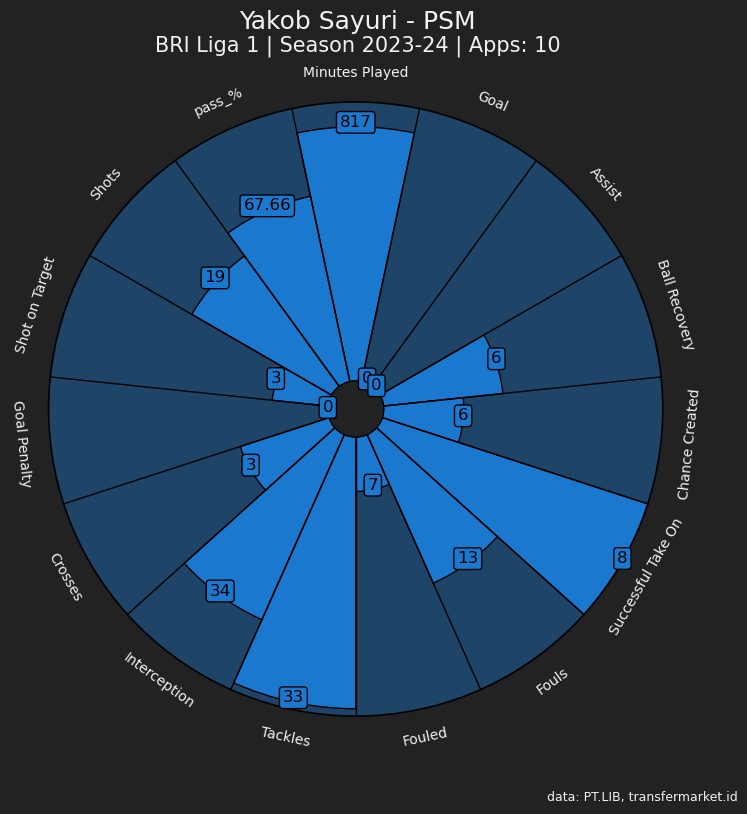

In [241]:
#9. Yakob Sayuri
yakob = mf[mf['nama']=='yakob sayuri']
yakob = list(yakob.iloc[0])
yakob = yakob[2:]


baker = PyPizza(
    params=param_mf,
    min_range=min_mf,        # min range values
    max_range=max_mf,        # max range values
    background_color="#222222", straight_line_color="#000000",
    last_circle_color="#000000", last_circle_lw=2.5, straight_line_lw=1,
    other_circle_lw=0, other_circle_color="#000000", inner_circle_size=10,
)

# plot pizza
fig, ax = baker.make_pizza(
    yakob,                     # list of values
    figsize=(8, 8),             # adjust figsize according to your need
    color_blank_space="same",   # use same color to fill blank space
    blank_alpha=0.4,            # alpha for blank-space colors
    param_location=110,         # where the parameters will be added
    kwargs_slices=dict(
        facecolor="#1A78CF", edgecolor="#000000",
        zorder=1, linewidth=1
    ),                          # values to be used when plotting slices
    kwargs_params=dict(
        color="#F2F2F2", fontsize=10, zorder=5, va="center"
    ),                          # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="#1A78CF",
            boxstyle="round,pad=0.2", lw=1
        )
    )                           # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.97, "Yakob Sayuri - PSM", size=18,
    ha="center", color="#F2F2F2"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "BRI Liga 1 | Season 2023-24 | Apps: 10",
    size=15,
    ha="center", color="#F2F2F2"
)

# add credits
CREDIT_1 = "data: PT.LIB, transfermarket.id"


fig.text(
    0.99, 0.005, f"{CREDIT_1}", size=9, color="#F2F2F2",
    ha="right"
)
plt.savefig("Yakob_S.png")
plt.show()


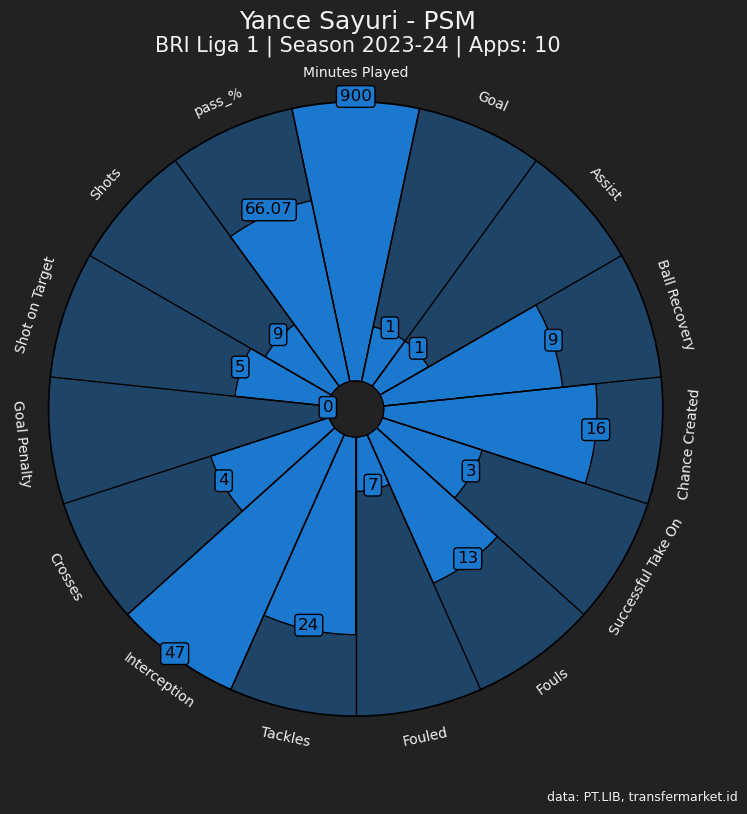

In [243]:
#10. Yance Sayuri
yance = mf[mf['nama']=='yance sayuri']
yance = list(yance.iloc[0])
yance = yance[2:]


baker = PyPizza(
    params=param_mf,
    min_range=min_mf,        # min range values
    max_range=max_mf,        # max range values
    background_color="#222222", straight_line_color="#000000",
    last_circle_color="#000000", last_circle_lw=2.5, straight_line_lw=1,
    other_circle_lw=0, other_circle_color="#000000", inner_circle_size=10,
)

# plot pizza
fig, ax = baker.make_pizza(
    yance,                     # list of values
    figsize=(8, 8),             # adjust figsize according to your need
    color_blank_space="same",   # use same color to fill blank space
    blank_alpha=0.4,            # alpha for blank-space colors
    param_location=110,         # where the parameters will be added
    kwargs_slices=dict(
        facecolor="#1A78CF", edgecolor="#000000",
        zorder=1, linewidth=1
    ),                          # values to be used when plotting slices
    kwargs_params=dict(
        color="#F2F2F2", fontsize=10, zorder=5, va="center"
    ),                          # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="#1A78CF",
            boxstyle="round,pad=0.2", lw=1
        )
    )                           # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.97, "Yance Sayuri - PSM", size=18,
    ha="center", color="#F2F2F2"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "BRI Liga 1 | Season 2023-24 | Apps: 10",
    size=15,
    ha="center", color="#F2F2F2"
)

# add credits
CREDIT_1 = "data: PT.LIB, transfermarket.id"


fig.text(
    0.99, 0.005, f"{CREDIT_1}", size=9, color="#F2F2F2",
    ha="right"
)
plt.savefig("Yance_S.png")
plt.show()


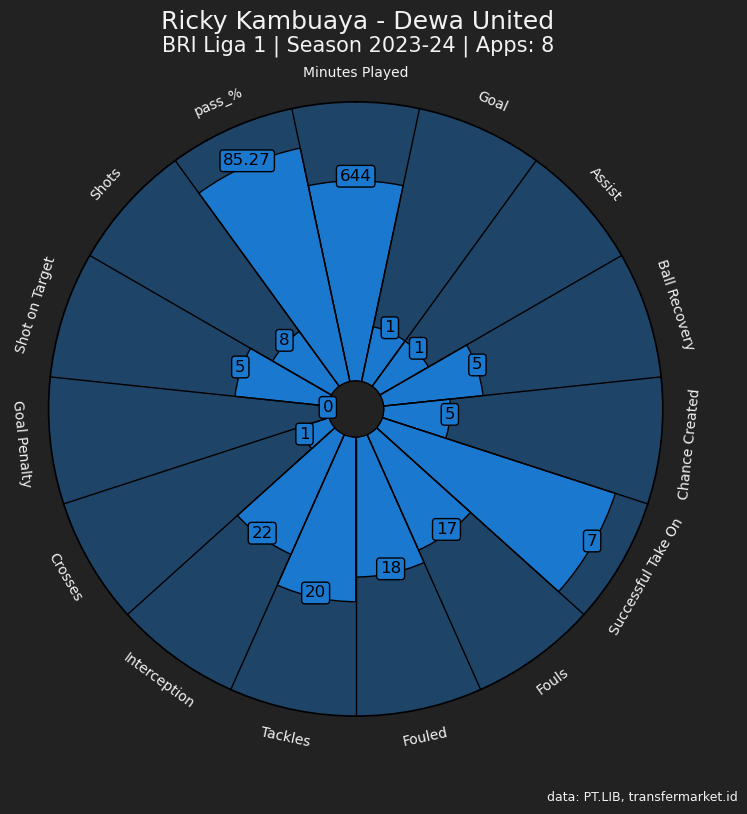

In [303]:
#11. Ricky Kambuaya
ricky = mf[mf['nama']=='ricky kambuaya']
ricky = list(ricky.iloc[0])
ricky = ricky[2:]


baker = PyPizza(
    params=param_mf,
    min_range=min_mf,        # min range values
    max_range=max_mf,        # max range values
    background_color="#222222", straight_line_color="#000000",
    last_circle_color="#000000", last_circle_lw=2.5, straight_line_lw=1,
    other_circle_lw=0, other_circle_color="#000000", inner_circle_size=10,
)

# plot pizza
fig, ax = baker.make_pizza(
    ricky,                     # list of values
    figsize=(8, 8),             # adjust figsize according to your need
    color_blank_space="same",   # use same color to fill blank space
    blank_alpha=0.4,            # alpha for blank-space colors
    param_location=110,         # where the parameters will be added
    kwargs_slices=dict(
        facecolor="#1A78CF", edgecolor="#000000",
        zorder=1, linewidth=1
    ),                          # values to be used when plotting slices
    kwargs_params=dict(
        color="#F2F2F2", fontsize=10, zorder=5, va="center"
    ),                          # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="#1A78CF",
            boxstyle="round,pad=0.2", lw=1
        )
    )                           # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.97, "Ricky Kambuaya - Dewa United", size=18,
    ha="center", color="#F2F2F2"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "BRI Liga 1 | Season 2023-24 | Apps: 8",
    size=15,
    ha="center", color="#F2F2F2"
)

# add credits
CREDIT_1 = "data: PT.LIB, transfermarket.id"


fig.text(
    0.99, 0.005, f"{CREDIT_1}", size=9, color="#F2F2F2",
    ha="right"
)
plt.savefig("R_Kambuaya.png")
plt.show()


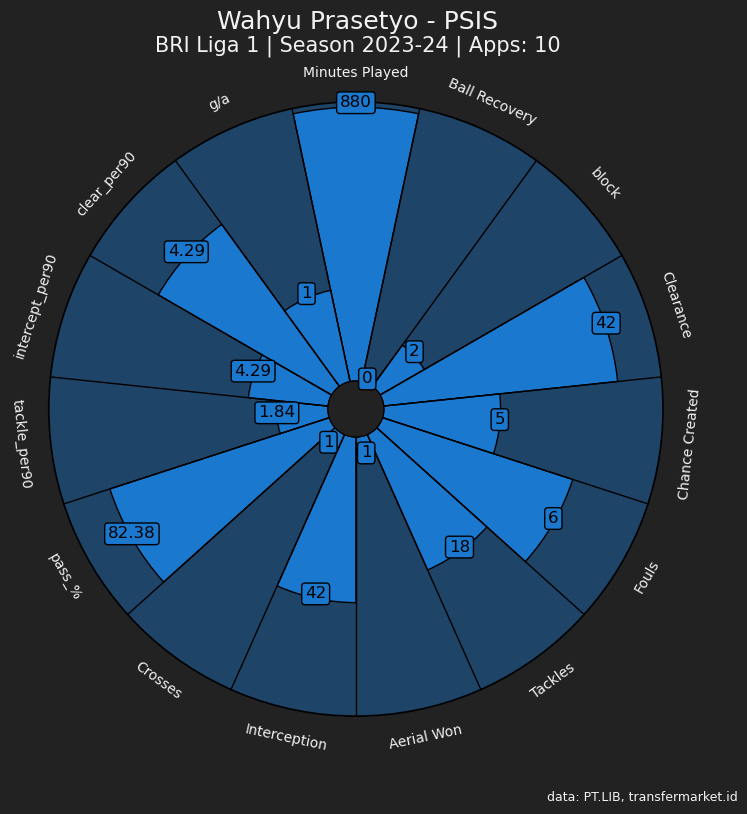

In [311]:
param_df = list(bc.columns)
param_df = param_df[2:]
max_df = [900,  10,  11,  50,  12,  0,  34,  13,  71,  15,
        100,  10,  15,  6,   3]
min_df = [1,   0,   0,  0,  0,   21,  0,  0,  0,
         0,   0,  0,  0,  0,0]
#12. Wahyu Prasetyo
wahyu = bc[bc['nama']=='wahyu prasetyo']
wahyu = list(wahyu.iloc[0])
wahyu = wahyu[2:]


baker = PyPizza(
    params=param_df,
    min_range=min_df,        # min range values
    max_range=max_df,        # max range values
    background_color="#222222", straight_line_color="#000000",
    last_circle_color="#000000", last_circle_lw=2.5, straight_line_lw=1,
    other_circle_lw=0, other_circle_color="#000000", inner_circle_size=10,
)

# plot pizza
fig, ax = baker.make_pizza(
    wahyu,                     # list of values
    figsize=(8, 8),             # adjust figsize according to your need
    color_blank_space="same",   # use same color to fill blank space
    blank_alpha=0.4,            # alpha for blank-space colors
    param_location=110,         # where the parameters will be added
    kwargs_slices=dict(
        facecolor="#1A78CF", edgecolor="#000000",
        zorder=1, linewidth=1
    ),                          # values to be used when plotting slices
    kwargs_params=dict(
        color="#F2F2F2", fontsize=10, zorder=5, va="center"
    ),                          # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="#1A78CF",
            boxstyle="round,pad=0.2", lw=1
        )
    )                           # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.97, "Wahyu Prasetyo - PSIS", size=18,
    ha="center", color="#F2F2F2"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "BRI Liga 1 | Season 2023-24 | Apps: 10",
    size=15,
    ha="center", color="#F2F2F2"
)

# add credits
CREDIT_1 = "data: PT.LIB, transfermarket.id"


fig.text(
    0.99, 0.005, f"{CREDIT_1}", size=9, color="#F2F2F2",
    ha="right"
)
plt.savefig("Wahyu_P.png")
plt.show()


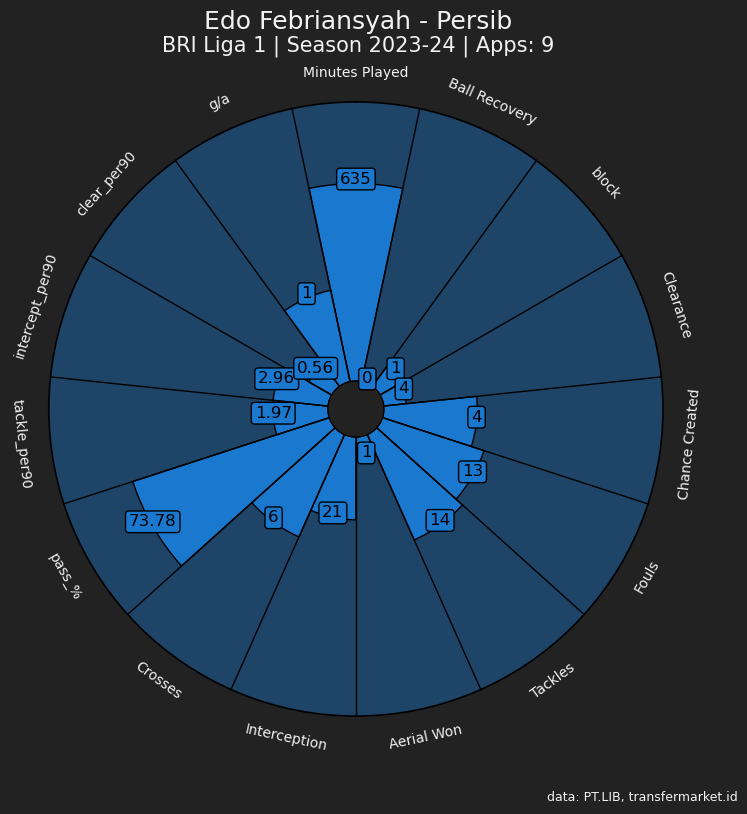

In [312]:
#13. Edo Febriansyah
edo = bc[bc['nama']=='edo febriansyah']
edo = list(edo.iloc[0])
edo = edo[2:]


baker = PyPizza(
    params=param_df,
    min_range=min_df,        # min range values
    max_range=max_df,        # max range values
    background_color="#222222", straight_line_color="#000000",
    last_circle_color="#000000", last_circle_lw=2.5, straight_line_lw=1,
    other_circle_lw=0, other_circle_color="#000000", inner_circle_size=10,
)

# plot pizza
fig, ax = baker.make_pizza(
    edo,                     # list of values
    figsize=(8, 8),             # adjust figsize according to your need
    color_blank_space="same",   # use same color to fill blank space
    blank_alpha=0.4,            # alpha for blank-space colors
    param_location=110,         # where the parameters will be added
    kwargs_slices=dict(
        facecolor="#1A78CF", edgecolor="#000000",
        zorder=1, linewidth=1
    ),                          # values to be used when plotting slices
    kwargs_params=dict(
        color="#F2F2F2", fontsize=10, zorder=5, va="center"
    ),                          # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="#1A78CF",
            boxstyle="round,pad=0.2", lw=1
        )
    )                           # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.97, "Edo Febriansyah - Persib", size=18,
    ha="center", color="#F2F2F2"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "BRI Liga 1 | Season 2023-24 | Apps: 9",
    size=15,
    ha="center", color="#F2F2F2"
)

# add credits
CREDIT_1 = "data: PT.LIB, transfermarket.id"


fig.text(
    0.99, 0.005, f"{CREDIT_1}", size=9, color="#F2F2F2",
    ha="right"
)
plt.savefig("Edo_F.png")
plt.show()


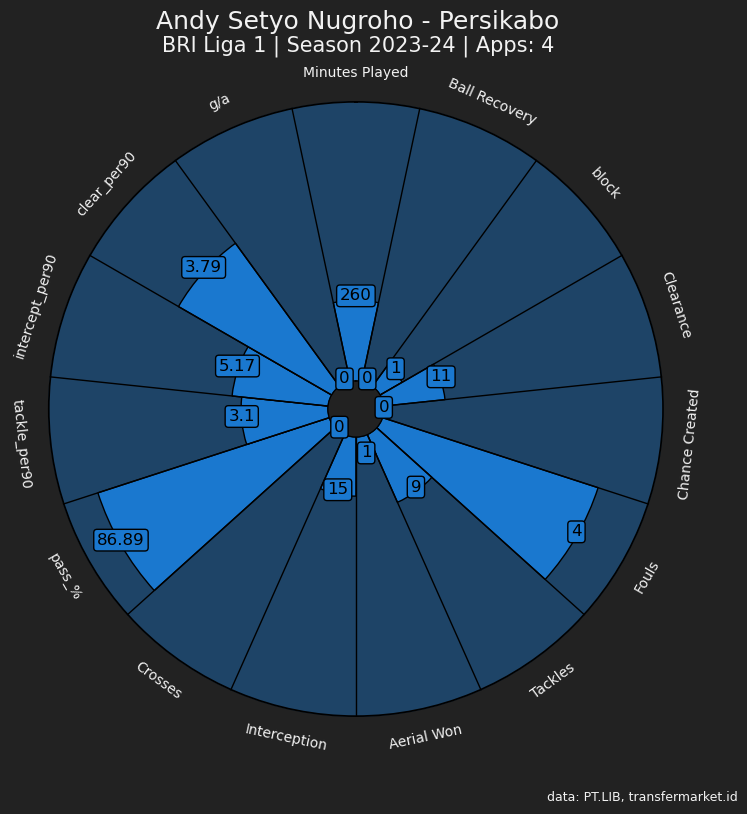

In [315]:
#14. Andi Setyo Nugroho
andi = bc[bc['nama']=='andy setyo nugroho']
andi = list(andi.iloc[0])
andi = andi[2:]


baker = PyPizza(
    params=param_df,
    min_range=min_df,        # min range values
    max_range=max_df,        # max range values
    background_color="#222222", straight_line_color="#000000",
    last_circle_color="#000000", last_circle_lw=2.5, straight_line_lw=1,
    other_circle_lw=0, other_circle_color="#000000", inner_circle_size=10,
)

# plot pizza
fig, ax = baker.make_pizza(
    andi,                     # list of values
    figsize=(8, 8),             # adjust figsize according to your need
    color_blank_space="same",   # use same color to fill blank space
    blank_alpha=0.4,            # alpha for blank-space colors
    param_location=110,         # where the parameters will be added
    kwargs_slices=dict(
        facecolor="#1A78CF", edgecolor="#000000",
        zorder=1, linewidth=1
    ),                          # values to be used when plotting slices
    kwargs_params=dict(
        color="#F2F2F2", fontsize=10, zorder=5, va="center"
    ),                          # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="#1A78CF",
            boxstyle="round,pad=0.2", lw=1
        )
    )                           # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.97, "Andy Setyo Nugroho - Persikabo", size=18,
    ha="center", color="#F2F2F2"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "BRI Liga 1 | Season 2023-24 | Apps: 4",
    size=15,
    ha="center", color="#F2F2F2"
)

# add credits
CREDIT_1 = "data: PT.LIB, transfermarket.id"


fig.text(
    0.99, 0.005, f"{CREDIT_1}", size=9, color="#F2F2F2",
    ha="right"
)
plt.savefig("Andy_S.png")
plt.show()


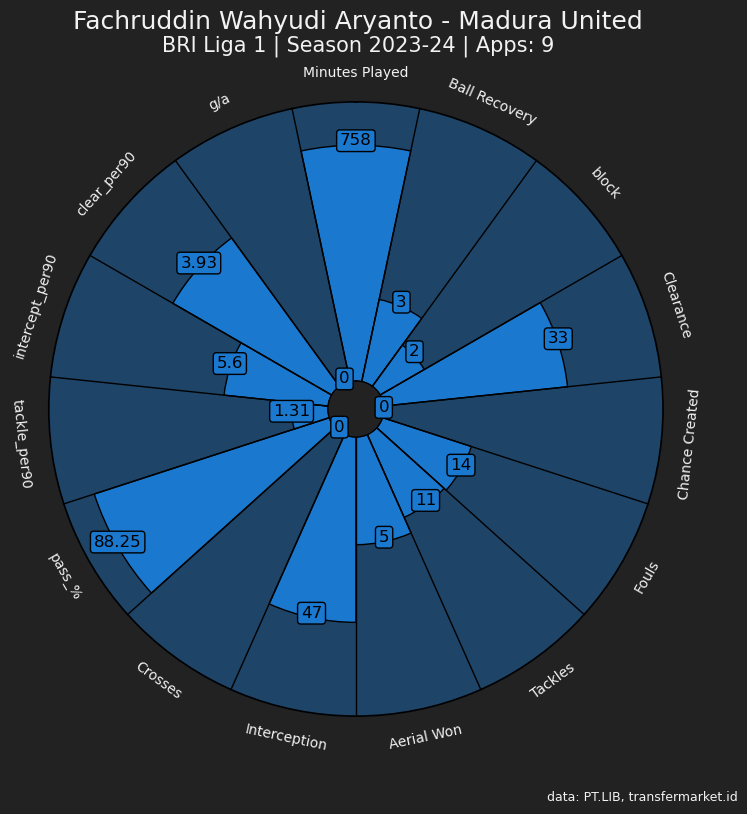

In [317]:
#15. Fachrudin Aryanto
fachru = bc[bc['nama']=='fachruddin aryanto']
fachru = list(fachru.iloc[0])
fachru = fachru[2:]


baker = PyPizza(
    params=param_df,
    min_range=min_df,        # min range values
    max_range=max_df,        # max range values
    background_color="#222222", straight_line_color="#000000",
    last_circle_color="#000000", last_circle_lw=2.5, straight_line_lw=1,
    other_circle_lw=0, other_circle_color="#000000", inner_circle_size=10,
)

# plot pizza
fig, ax = baker.make_pizza(
    fachru,                     # list of values
    figsize=(8, 8),             # adjust figsize according to your need
    color_blank_space="same",   # use same color to fill blank space
    blank_alpha=0.4,            # alpha for blank-space colors
    param_location=110,         # where the parameters will be added
    kwargs_slices=dict(
        facecolor="#1A78CF", edgecolor="#000000",
        zorder=1, linewidth=1
    ),                          # values to be used when plotting slices
    kwargs_params=dict(
        color="#F2F2F2", fontsize=10, zorder=5, va="center"
    ),                          # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="#1A78CF",
            boxstyle="round,pad=0.2", lw=1
        )
    )                           # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.97, "Fachruddin Wahyudi Aryanto - Madura United", size=18,
    ha="center", color="#F2F2F2"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "BRI Liga 1 | Season 2023-24 | Apps: 9",
    size=15,
    ha="center", color="#F2F2F2"
)

# add credits
CREDIT_1 = "data: PT.LIB, transfermarket.id"


fig.text(
    0.99, 0.005, f"{CREDIT_1}", size=9, color="#F2F2F2",
    ha="right"
)
plt.savefig("A_Fachru.png")
plt.show()


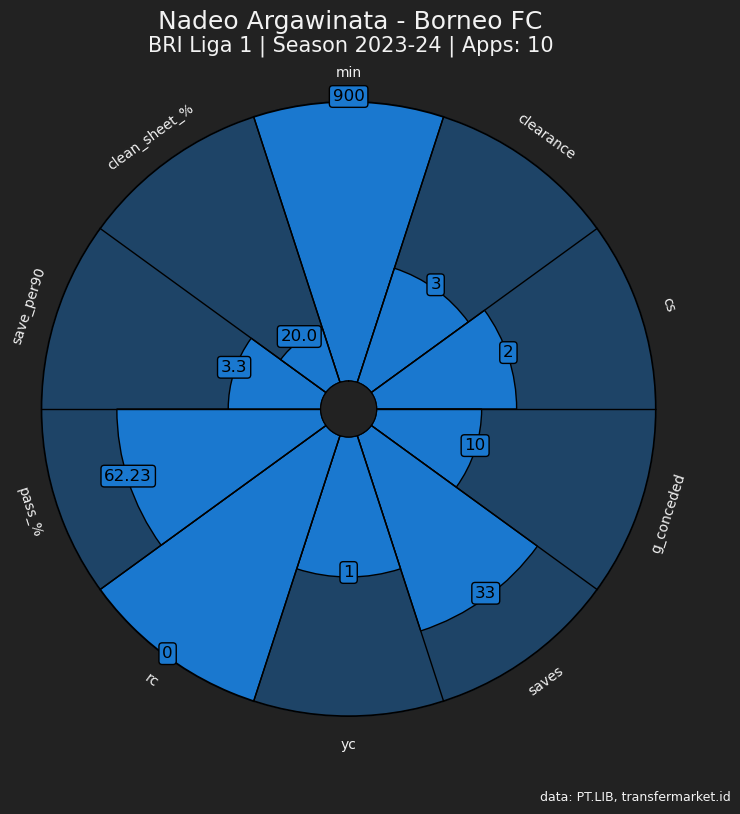

In [319]:
param_gk = list(gk.columns)
param_gk = param_gk[2:]
max_gk = [  900  ,   7  ,   4  ,  0  ,  45  ,   0  ,   0  ,
        85.51,  10.  , 100.  ]
min_gk = [1  ,   0  ,   0  ,  16  ,  0  ,   2  ,   1  ,
        0,  0  , 0  ]
#16. Nadeo Argawinata
nadeo = gk[gk['nama']=='nadeo argawinata']
nadeo = list(nadeo.iloc[0])
nadeo = nadeo[2:]
baker = PyPizza(
    params=param_gk,
    min_range=min_gk,        # min range values
    max_range=max_gk,        # max range values
    background_color="#222222", straight_line_color="#000000",
    last_circle_color="#000000", last_circle_lw=2.5, straight_line_lw=1,
    other_circle_lw=0, other_circle_color="#000000", inner_circle_size=10,
)

# plot pizza
fig, ax = baker.make_pizza(
    nadeo,                     # list of values
    figsize=(8, 8),             # adjust figsize according to your need
    color_blank_space="same",   # use same color to fill blank space
    blank_alpha=0.4,            # alpha for blank-space colors
    param_location=110,         # where the parameters will be added
    kwargs_slices=dict(
        facecolor="#1A78CF", edgecolor="#000000",
        zorder=1, linewidth=1
    ),                          # values to be used when plotting slices
    kwargs_params=dict(
        color="#F2F2F2", fontsize=10, zorder=5, va="center"
    ),                          # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="#1A78CF",
            boxstyle="round,pad=0.2", lw=1
        )
    )                           # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.97, "Nadeo Argawinata - Borneo FC", size=18,
    ha="center", color="#F2F2F2"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "BRI Liga 1 | Season 2023-24 | Apps: 10",
    size=15,
    ha="center", color="#F2F2F2"
)

# add credits
CREDIT_1 = "data: PT.LIB, transfermarket.id"


fig.text(
    0.99, 0.005, f"{CREDIT_1}", size=9, color="#F2F2F2",
    ha="right"
)
plt.savefig("Nadeo_A.png")
plt.show()

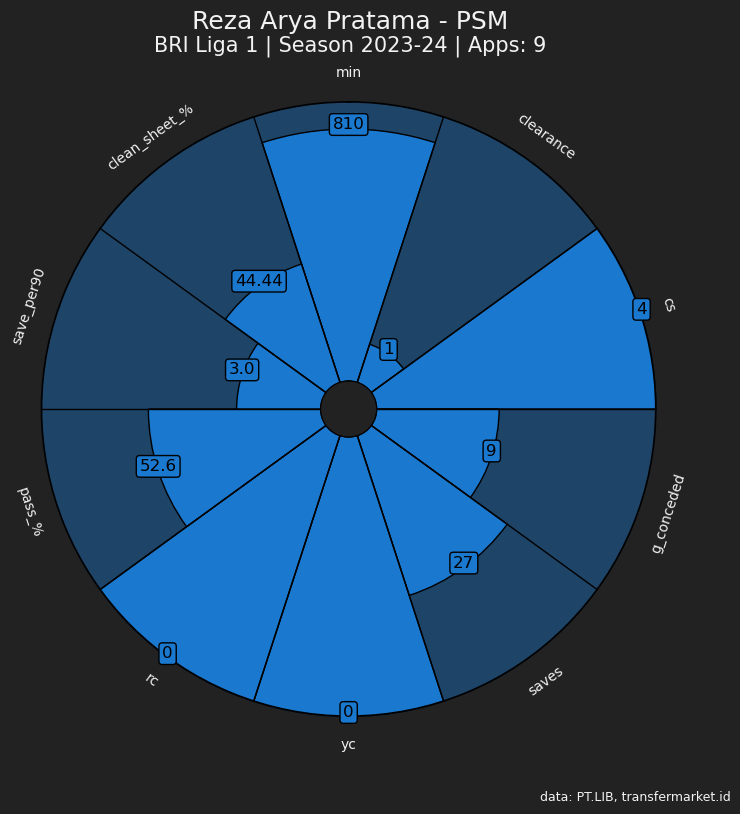

In [321]:
#17. Reza Arya Pratama
reza = gk[gk['nama']=='m reza arya pratama']
reza = list(reza.iloc[0])
reza = reza[2:]
baker = PyPizza(
    params=param_gk,
    min_range=min_gk,        # min range values
    max_range=max_gk,        # max range values
    background_color="#222222", straight_line_color="#000000",
    last_circle_color="#000000", last_circle_lw=2.5, straight_line_lw=1,
    other_circle_lw=0, other_circle_color="#000000", inner_circle_size=10,
)

# plot pizza
fig, ax = baker.make_pizza(
    reza,                     # list of values
    figsize=(8, 8),             # adjust figsize according to your need
    color_blank_space="same",   # use same color to fill blank space
    blank_alpha=0.4,            # alpha for blank-space colors
    param_location=110,         # where the parameters will be added
    kwargs_slices=dict(
        facecolor="#1A78CF", edgecolor="#000000",
        zorder=1, linewidth=1
    ),                          # values to be used when plotting slices
    kwargs_params=dict(
        color="#F2F2F2", fontsize=10, zorder=5, va="center"
    ),                          # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="#1A78CF",
            boxstyle="round,pad=0.2", lw=1
        )
    )                           # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.97, "Reza Arya Pratama - PSM", size=18,
    ha="center", color="#F2F2F2"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "BRI Liga 1 | Season 2023-24 | Apps: 9",
    size=15,
    ha="center", color="#F2F2F2"
)

# add credits
CREDIT_1 = "data: PT.LIB, transfermarket.id"


fig.text(
    0.99, 0.005, f"{CREDIT_1}", size=9, color="#F2F2F2",
    ha="right"
)
plt.savefig("Reza_A.png")
plt.show()

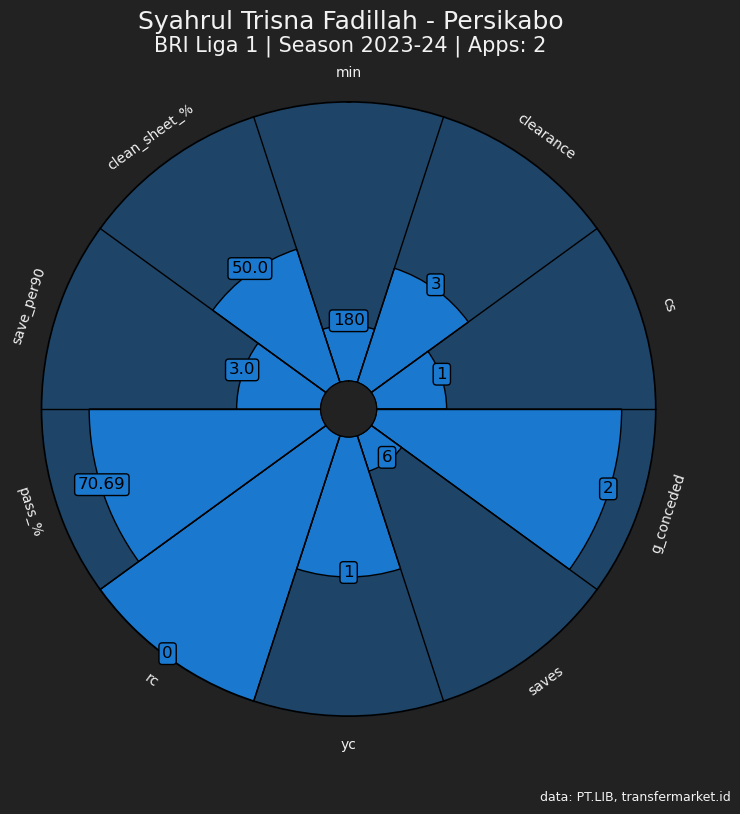

In [323]:
#18. Syahrul Trisna
syahrul = gk[gk['nama']=='syahrul trisna fadila']
syahrul = list(syahrul.iloc[0])
syahrul = syahrul[2:]
baker = PyPizza(
    params=param_gk,
    min_range=min_gk,        # min range values
    max_range=max_gk,        # max range values
    background_color="#222222", straight_line_color="#000000",
    last_circle_color="#000000", last_circle_lw=2.5, straight_line_lw=1,
    other_circle_lw=0, other_circle_color="#000000", inner_circle_size=10,
)

# plot pizza
fig, ax = baker.make_pizza(
    syahrul,                     # list of values
    figsize=(8, 8),             # adjust figsize according to your need
    color_blank_space="same",   # use same color to fill blank space
    blank_alpha=0.4,            # alpha for blank-space colors
    param_location=110,         # where the parameters will be added
    kwargs_slices=dict(
        facecolor="#1A78CF", edgecolor="#000000",
        zorder=1, linewidth=1
    ),                          # values to be used when plotting slices
    kwargs_params=dict(
        color="#F2F2F2", fontsize=10, zorder=5, va="center"
    ),                          # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="#1A78CF",
            boxstyle="round,pad=0.2", lw=1
        )
    )                           # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.97, "Syahrul Trisna Fadillah - Persikabo", size=18,
    ha="center", color="#F2F2F2"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "BRI Liga 1 | Season 2023-24 | Apps: 2",
    size=15,
    ha="center", color="#F2F2F2"
)

# add credits
CREDIT_1 = "data: PT.LIB, transfermarket.id"


fig.text(
    0.99, 0.005, f"{CREDIT_1}", size=9, color="#F2F2F2",
    ha="right"
)
plt.savefig("Syahrul_T.png")
plt.show()